## Introduction
This challenge was designed by Data Science Nigeria specifically for the DSN Bootcamp 2018, which takes place 11-14 October.
SuperLender is a local digital lending company, which prides itself in its effective use of credit risk models to deliver profitable and high-impact loan alternative.
Its assessment approach is based on two main risk drivers of loan default prediction:
> - Willingness to pay and
> - Ability to pay

### The road ahead:
- Importing relevant libraries
- The data
- Data Analysis and Exploration
- Data Preprocessing
- Model building

### Importing relevant libraries

In [189]:
#for data frames
import pandas as pd

# for algebra
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# models to be build
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Cross validation
from sklearn.model_selection import cross_val_score

#Metrics
from sklearn import metrics

#Train test split
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
#Igonring warnings
import warnings
warnings.filterwarnings("ignore")

from ggplot import *
import os
import sys
from datetime import datetime
#Importing resmple module from SKlearn
from sklearn.utils import resample

### Getting the data

#### Demographic data

In [190]:
# Demographic data
df_demogra = pd.read_csv('../Data Sets/traindemographics.csv')

df_demogra.head().T

0  \
customerid                  8a858e135cb22031015cbafc76964ebd   
birthdate                         1973-10-10 00:00:00.000000   
bank_account_type                                    Savings   
longitude_gps                                        3.31922   
latitude_gps                                          6.5286   
bank_name_clients                                    GT Bank   
bank_branch_clients                                      NaN   
employment_status_clients                                NaN   
level_of_education_clients                               NaN   

                                                           1  \
customerid                  8a858e275c7ea5ec015c82482d7c3996   
birthdate                         1986-01-21 00:00:00.000000   
bank_account_type                                    Savings   
longitude_gps                                         3.3256   
latitude_gps                                          7.1194   
bank_name_clients                              Sterling Bank   
bank_branch_clients                                      NaN   
employment_status_clients                          Permanent   
level_of_education_clients                               NaN   

                                                           2  \
customerid                  8a858e5b5bd99460015bdc95cd485634   
birthdate                         1987-04-01 00:00:00.000000   
bank_account_type                                    Savings   
longitude_gps                                         5.7461   
latitude_gps                                         5.56317   
bank_name_clients                              Fidelity Bank   
bank_branch_clients                                      NaN   
employment_status_clients                                NaN   
level_of_education_clients                               NaN   

                                                           3  \
customerid                  8a858efd5ca70688015cabd1f1e94b55   
birthdate                         1991-07-19 00:00:00.000000   
bank_account_type                                    Savings   
longitude_gps                                        3.36285   
latitude_gps                                         6.64249   
bank_name_clients                                    GT Bank   
bank_branch_clients                                      NaN   
employment_status_clients                          Permanent   
level_of_education_clients                               NaN   

                                                           4  
customerid                  8a858e785acd3412015acd48f4920d04  
birthdate                         1982-11-22 00:00:00.000000  
bank_account_type                                    Savings  
longitude_gps                                        8.45533  
latitude_gps                                         11.9714  
bank_name_clients                                    GT Bank  
bank_branch_clients                                      NaN  
employment_status_clients                          Permanent  
level_of_education_clients                               NaN

#### Performance data

In [191]:
df_trainperf=pd.read_csv('../Data Sets/trainperf.csv')
df_trainperf.head().T

0  \
customerid     8a2a81a74ce8c05d014cfb32a0da1049   
systemloanid                          301994762   
loannumber                                   12   
approveddate         2017-07-25 08:22:56.000000   
creationdate         2017-07-25 07:22:47.000000   
loanamount                                30000   
totaldue                                  34500   
termdays                                     30   
referredby                                  NaN   
good_bad_flag                              Good   

                                              1  \
customerid     8a85886e54beabf90154c0a29ae757c0   
systemloanid                          301965204   
loannumber                                    2   
approveddate         2017-07-05 17:04:41.000000   
creationdate         2017-07-05 16:04:18.000000   
loanamount                                15000   
totaldue                                  17250   
termdays                                     30   
referredby                                  NaN   
good_bad_flag                              Good   

                                              2  \
customerid     8a8588f35438fe12015444567666018e   
systemloanid                          301966580   
loannumber                                    7   
approveddate         2017-07-06 14:52:57.000000   
creationdate         2017-07-06 13:52:51.000000   
loanamount                                20000   
totaldue                                  22250   
termdays                                     15   
referredby                                  NaN   
good_bad_flag                              Good   

                                              3  \
customerid     8a85890754145ace015429211b513e16   
systemloanid                          301999343   
loannumber                                    3   
approveddate         2017-07-27 19:00:41.000000   
creationdate         2017-07-27 18:00:35.000000   
loanamount                                10000   
totaldue                                  11500   
termdays                                     15   
referredby                                  NaN   
good_bad_flag                              Good   

                                              4  
customerid     8a858970548359cc0154883481981866  
systemloanid                          301962360  
loannumber                                    9  
approveddate         2017-07-03 23:42:45.000000  
creationdate         2017-07-03 22:42:39.000000  
loanamount                                40000  
totaldue                                  44000  
termdays                                     30  
referredby                                  NaN  
good_bad_flag                              Good

In [192]:
#checking data size
df_demogra.shape, df_trainperf.shape

((4346, 9), (4368, 10))

## Data Analysis and Exploration

** checking for missing values**

In [193]:
df_demogra.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [194]:
df_trainperf.isnull().sum()

customerid          0
systemloanid        0
loannumber          0
approveddate        0
creationdate        0
loanamount          0
totaldue            0
termdays            0
referredby       3781
good_bad_flag       0
dtype: int64

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values. Let's just remove the features with 30% or more NaN values

In [195]:
df2 = df_demogra[[column for column in df_demogra if df_demogra[column].count() / len(df_demogra) >= 0.3]]

print("List of dropped columns:", end=" ")
for c in df_demogra.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df_demogra = df2

List of dropped columns: bank_branch_clients, level_of_education_clients, 



In [196]:
df1 = df_trainperf[[column for column in df_trainperf if df_trainperf[column].count() / len(df_trainperf) >= 0.3]]

print("List of dropped columns:", end=" ")
for c in df_trainperf.columns:
    if c not in df1.columns:
        print(c, end=", ")
print('\n')
df_trainperf = df1

List of dropped columns: referredby, 



In [197]:
# Any missing values?
df_demogra.isnull().values.any()

True

In [198]:
# Total number of missing values
df_demogra.isnull().sum().sum()

648

In [199]:
# Any missing values?
df_trainperf.isnull().values.any()

False

In [200]:
df_demogra.isnull().sum()

customerid                     0
birthdate                      0
bank_account_type              0
longitude_gps                  0
latitude_gps                   0
bank_name_clients              0
employment_status_clients    648
dtype: int64

since this employment status is quite an important feature for loan prediction, we will just drop the nulls. Clearly we wil loose some information

In [201]:
df_demogra.dropna(inplace=True)

#### We now use customerid column to Join demographic data and perfomance data 

In [202]:
df=pd.merge(df_demogra,df_trainperf,on='customerid')
df.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'systemloanid', 'loannumber', 'approveddate', 'creationdate',
       'loanamount', 'totaldue', 'termdays', 'good_bad_flag'],
      dtype='object')

In [203]:
df.shape

(2784, 15)

In [204]:
df.head().T

0  \
customerid                 8a858e275c7ea5ec015c82482d7c3996   
birthdate                        1986-01-21 00:00:00.000000   
bank_account_type                                   Savings   
longitude_gps                                        3.3256   
latitude_gps                                         7.1194   
bank_name_clients                             Sterling Bank   
employment_status_clients                         Permanent   
systemloanid                                      301972172   
loannumber                                                2   
approveddate                     2017-07-10 21:21:46.000000   
creationdate                     2017-07-10 20:21:40.000000   
loanamount                                            10000   
totaldue                                              13000   
termdays                                                 30   
good_bad_flag                                           Bad   

                                                          1  \
customerid                 8a858efd5ca70688015cabd1f1e94b55   
birthdate                        1991-07-19 00:00:00.000000   
bank_account_type                                   Savings   
longitude_gps                                       3.36285   
latitude_gps                                        6.64249   
bank_name_clients                                   GT Bank   
employment_status_clients                         Permanent   
systemloanid                                      301997763   
loannumber                                                2   
approveddate                     2017-07-26 21:03:17.000000   
creationdate                     2017-07-26 20:03:09.000000   
loanamount                                            10000   
totaldue                                              11500   
termdays                                                 15   
good_bad_flag                                          Good   

                                                          2  \
customerid                 8a858ea05a859123015a8892914d15b7   
birthdate                        1990-07-21 00:00:00.000000   
bank_account_type                                   Savings   
longitude_gps                                       3.36593   
latitude_gps                                        6.56482   
bank_name_clients                               Access Bank   
employment_status_clients                         Permanent   
systemloanid                                      301992494   
loannumber                                                6   
approveddate                     2017-07-23 21:44:43.000000   
creationdate                     2017-07-23 20:44:36.000000   
loanamount                                            20000   
totaldue                                              24500   
termdays                                                 30   
good_bad_flag                                          Good   

                                                          3  \
customerid                 8a858f405d13c45f015d13dd93ec0c1c   
birthdate                        1992-11-17 00:00:00.000000   
bank_account_type                                   Savings   
longitude_gps                                       3.29059   
latitude_gps                                        6.61207   
bank_name_clients                                   EcoBank   
employment_status_clients                         Permanent   
systemloanid                                      302000213   
loannumber                                                2   
approveddate                     2017-07-28 10:13:02.000000   
creationdate                     2017-07-28 09:12:57.000000   
loanamount                                            10000   
totaldue                                              13000   
termdays                                                 30   
good_bad_flag                                          Good   

                      

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2784 entries, 0 to 2783
Data columns (total 15 columns):
customerid                   2784 non-null object
birthdate                    2784 non-null object
bank_account_type            2784 non-null object
longitude_gps                2784 non-null float64
latitude_gps                 2784 non-null float64
bank_name_clients            2784 non-null object
employment_status_clients    2784 non-null object
systemloanid                 2784 non-null int64
loannumber                   2784 non-null int64
approveddate                 2784 non-null object
creationdate                 2784 non-null object
loanamount                   2784 non-null float64
totaldue                     2784 non-null float64
termdays                     2784 non-null int64
good_bad_flag                2784 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 348.0+ KB


** Since the date data type is represnted as an object, we will change date format to int.**

In [206]:
#Creating birth year columns in  a datetime format
df['birth_year'] =df['birthdate'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").year)

#Creating birth month columns in  a datetime format
df['birth_month'] =df['birthdate'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").month)

#Creating birth day columns in  a datetime format
df['birth_day'] =df['birthdate'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").day)

# Creating a column for approval year in a date time format
df['approve_year'] =df['approveddate'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").year)

# Creating a column for approval month in a date time format
df['approve_month'] =df['approveddate'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").month)

# Creating a column for approval day in a date time format
df['approve_day'] =df['approveddate'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").day)

# Creating a column for creation year in a date time format
df['creation_year'] =df['creationdate'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").year)

# Creating a column for creation month in a date time format
df['creation_month'] =df['creationdate'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").month)

# Creating a column for creation day in a date time format
df['creation_day'] =df['creationdate'].apply(lambda x:datetime.strptime(x,"%Y-%m-%d %H:%M:%S.%f").day)


### Summary statistics

In [207]:

df.describe().T

count          mean           std           min  \
longitude_gps   2784.0  4.569661e+00      8.346951 -1.182470e+02   
latitude_gps    2784.0  7.330881e+00      3.490291 -3.386882e+01   
systemloanid    2784.0  3.019806e+08  13465.905523  3.019585e+08   
loannumber      2784.0  5.437141e+00      3.804937  2.000000e+00   
loanamount      2784.0  1.838362e+04  11146.563742  1.000000e+04   
totaldue        2784.0  2.189511e+04  12350.791269  1.000000e+04   
termdays        2784.0  2.975754e+01     11.765791  1.500000e+01   
birth_year      2784.0  1.984281e+03      6.066134  1.961000e+03   
birth_month     2784.0  6.531968e+00      3.375588  1.000000e+00   
birth_day       2784.0  1.558800e+01      8.630275  1.000000e+00   
approve_year    2784.0  2.017000e+03      0.000000  2.017000e+03   
approve_month   2784.0  7.000000e+00      0.000000  7.000000e+00   
approve_day     2784.0  1.553592e+01      8.687541  1.000000e+00   
creation_year   2784.0  2.017000e+03      0.000000  2.017000e+03   
creation_month  2784.0  7.000000e+00      0.000000  7.000000e+00   
creation_day    2784.0  1.552443e+01      8.688698  1.000000e+00   

                         25%           50%           75%           max  
longitude_gps   3.355595e+00  3.591668e+00  6.698681e+00  1.512093e+02  
latitude_gps    6.467264e+00  6.622599e+00  7.430067e+00  7.122807e+01  
systemloanid    3.019686e+08  3.019794e+08  3.019933e+08  3.020040e+08  
loannumber      2.000000e+00  4.000000e+00  8.000000e+00  2.700000e+01  
loanamount      1.000000e+04  1.000000e+04  3.000000e+04  6.000000e+04  
totaldue        1.300000e+04  1.300000e+04  3.300000e+04  6.810000e+04  
termdays        3.000000e+01  3.000000e+01  3.000000e+01  9.000000e+01  
birth_year      1.981000e+03  1.985000e+03  1.989000e+03  1.996000e+03  
birth_month     4.000000e+00  6.000000e+00  1.000000e+01  1.200000e+01  
birth_day       8.000000e+00  1.500000e+01  2.300000e+01  3.100000e+01  
approve_year    2.017000e+03  2.017000e+03  2.017000e+03  2.017000e+03  
approve_month   7.000000e+00  7.000000e+00  7.000000e+00  7.000000e+00  
approve_day     7.000000e+00  1.500000e+01  2.400000e+01  3.000000e+01  
creation_year   2.017000e+03  2.017000e+03  2.017000e+03  2.017000e+03  
creation_month  7.000000e+00  7.000000e+00  7.000000e+00  7.000000e+00  
creation_day    7.000000e+00  1.500000e+01  2.400000e+01  3.000000e+01

we can observe that features like **creation_year**, **creation_month**,**approve_year**, **approve_month**, do not really have useful information

### Features distributions

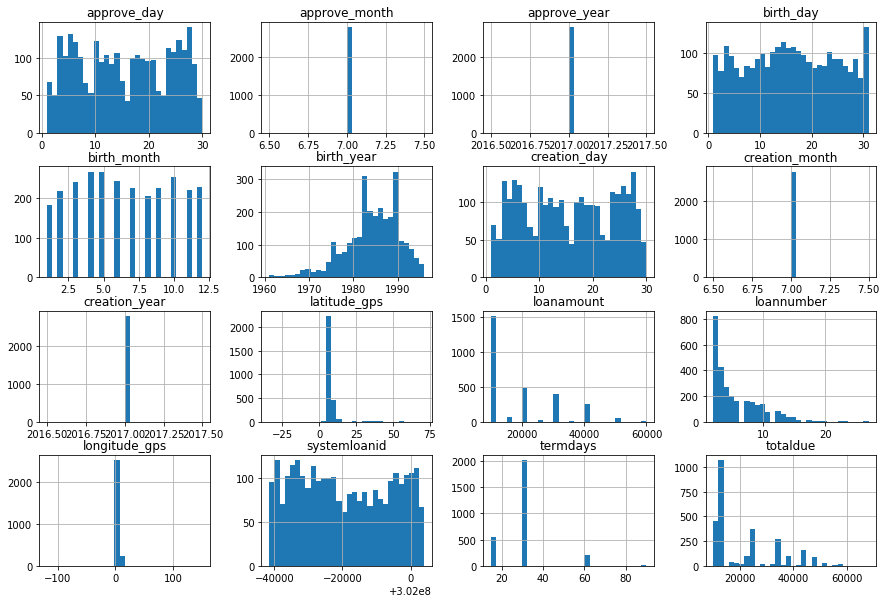

In [208]:
df.hist(bins=30,figsize=(15,10))
plt.show()

We will now remove features that do not have sufficient information or insights to explore.

In [209]:
df.drop(['longitude_gps','latitude_gps','approve_year', 'approve_month','approve_day','creation_year', 'creation_month', 'creation_day'],axis=1,inplace=True)

We will now visualise employment status feature

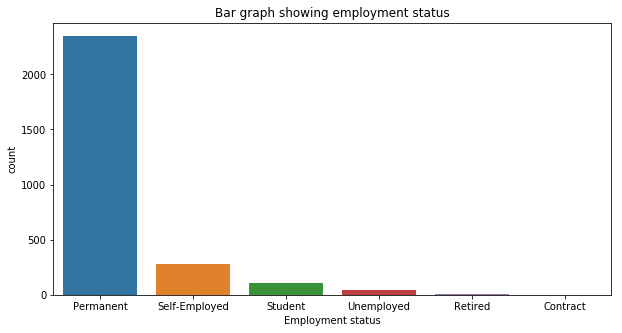

In [210]:
a =df['employment_status_clients'].value_counts().reset_index()
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='index',y='employment_status_clients',data=a, ax=ax)
ax.set_title('Bar graph showing employment status')
ax.set_ylabel('count')
ax.set_xlabel('Employment status')
plt.show()

#### Box plot

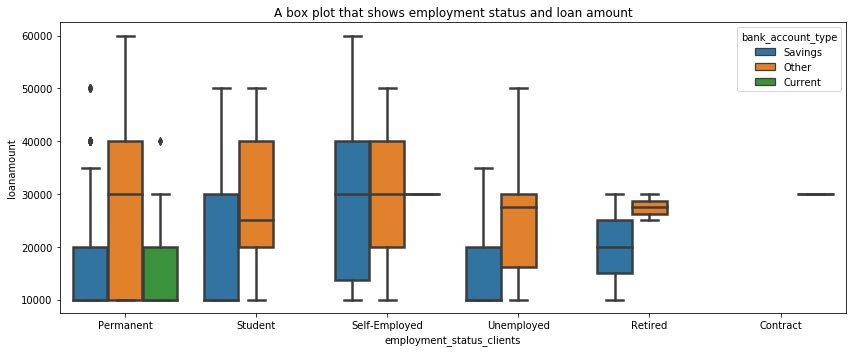

In [211]:
fig,ax = plt.subplots(figsize=(12,5))
sns.boxplot(x="employment_status_clients", y="loanamount", data=df,ax=ax,hue='bank_account_type',linewidth=2.5)
ax.set_title('A box plot that shows employment status and loan amount')
plt.tight_layout()
plt.show()

We can observe that clients with other bank acount types turn to take higher loans amount, than clients with savings and current account types. And also clients that are working on contracts turn to not take a loan regardless of bank acount type.

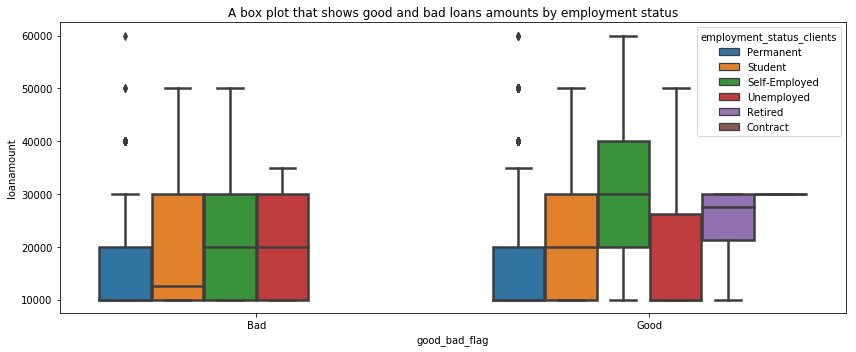

In [212]:
fig,ax = plt.subplots(figsize=(12,5))
sns.boxplot(x="good_bad_flag", y="loanamount", data=df,ax=ax,hue='employment_status_clients',linewidth=2.5)
ax.set_title('A box plot that shows good and bad loans amounts by employment status')
plt.tight_layout()
plt.show()

#### A bar graph for different banks names

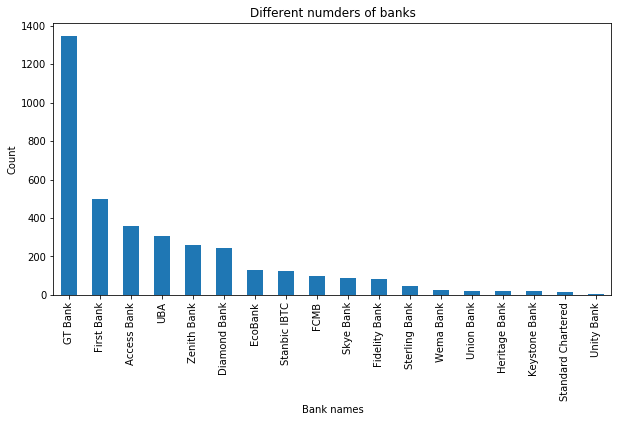

In [213]:
df_demogra['bank_name_clients'].value_counts().plot(kind='bar', figsize=(10,5))
plt.xlabel('Bank names')
plt.ylabel('Count')
plt.title('Different numders of banks')
plt.show()

GT Bank have more gives more loans than other banks

### Correlation heatmap

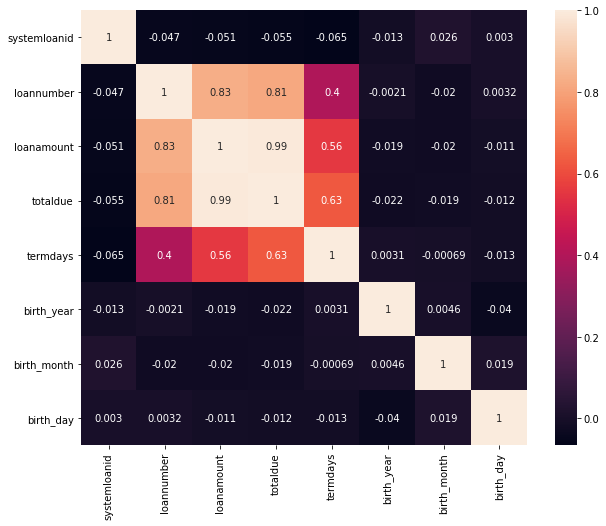

In [214]:
fig, ax =plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

We observe that loan amount, loan number, total due and term days are highly correlated.

Correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have any relationship to the target_var

#### A pair plots that shows different relationships between features

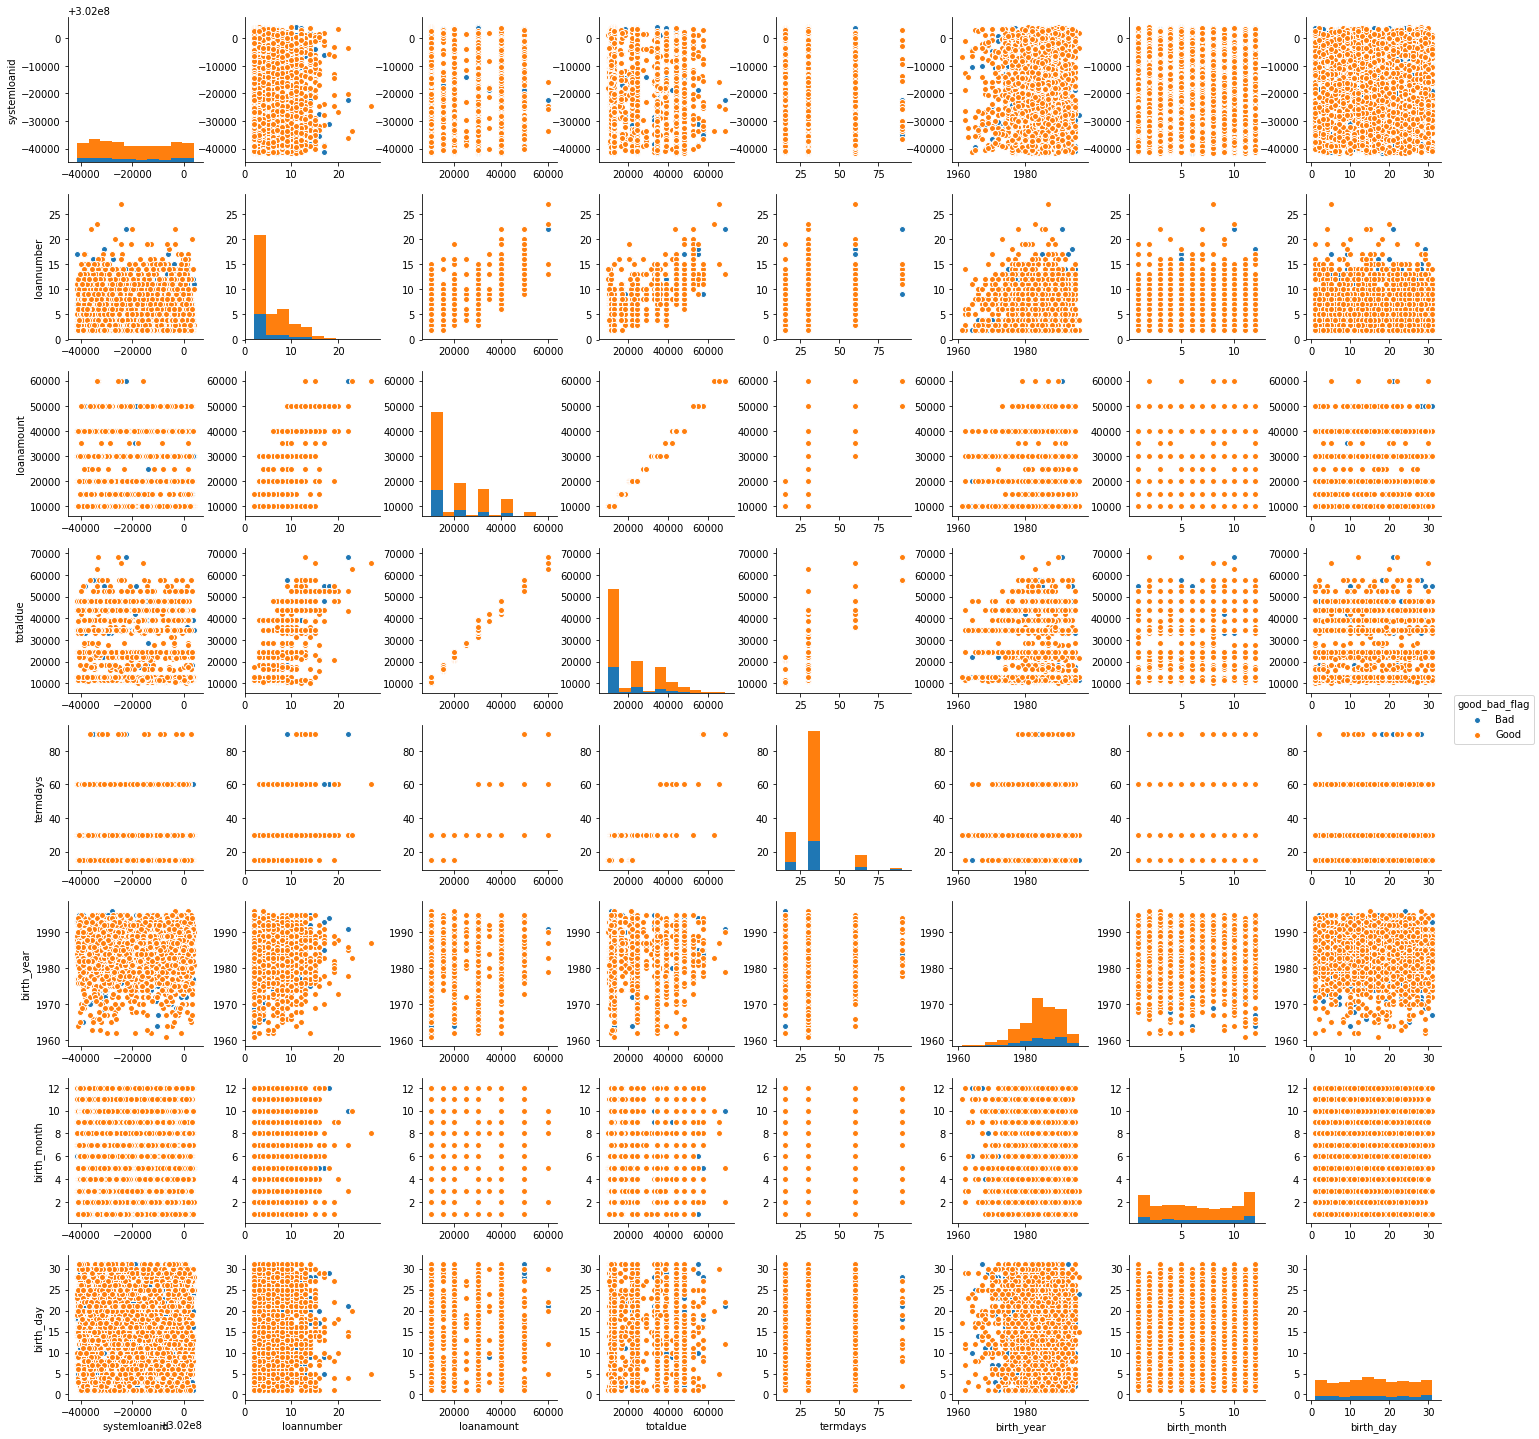

In [215]:
sns.pairplot(df,hue='good_bad_flag')
plt.show()

We can observe that, many features do not share clear trend. But loan amount and total due are positively related.

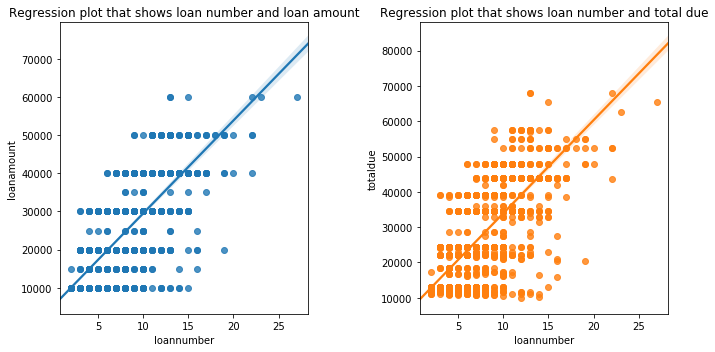

In [216]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(10,5))
sns.regplot(x='loannumber',y='loanamount',data=df,ax=ax1)
ax1.set_title('Regression plot that shows loan number and loan amount')
sns.regplot(x='loannumber',y='totaldue',data=df,ax=ax2)
ax2.set_title('Regression plot that shows loan number and total due')
plt.tight_layout()
plt.show()

We can see that as the number of loans increases, chances are you get higher loan amount

#### Loan amount and number of loans distributions

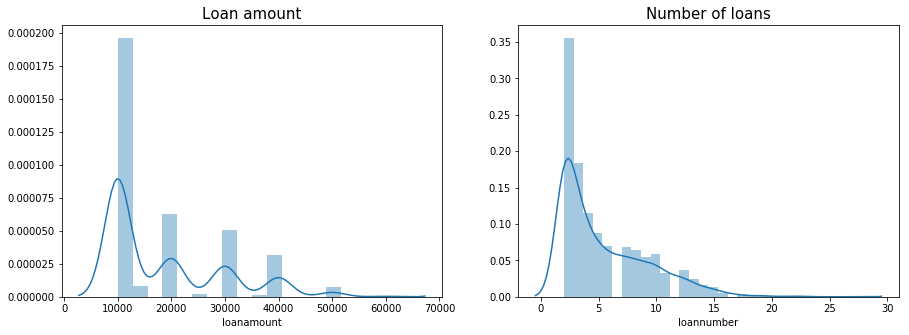

In [217]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(df.loanamount,ax=axs[0])
axs[0].set_title('Loan amount',fontsize=15)
sns.distplot(df.loannumber,ax=axs[1])
axs[1].set_title('Number of loans', fontsize=15)
plt.show()

#### A bar graph that shows different banks and  loan amount

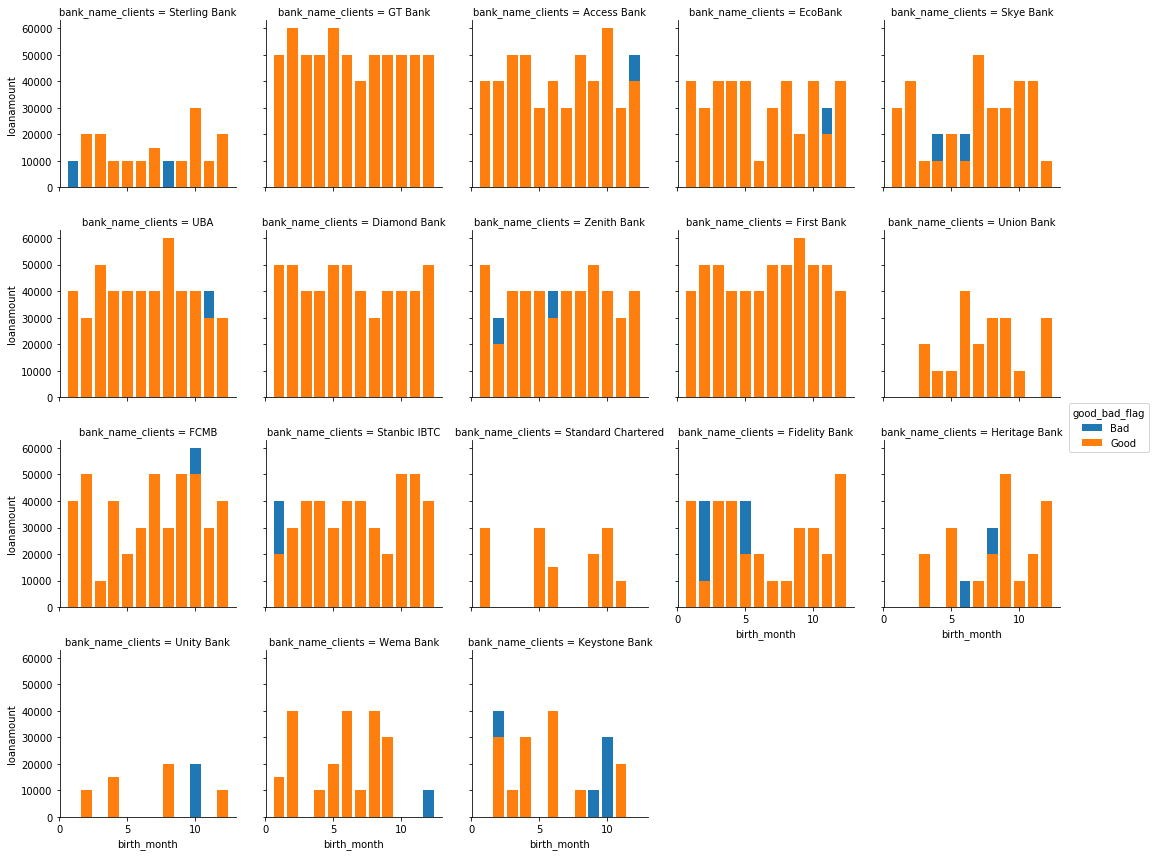

In [218]:
ax= sns.FacetGrid(data=df,col='bank_name_clients',col_wrap=5,hue='good_bad_flag')
ax = (ax.map(plt.bar,'birth_month','loanamount').add_legend())


Most banks seems to have loan good loans in general. But i think this is because we do not have lots of data, and we do not have enough information

In [219]:
df.columns

Index(['customerid', 'birthdate', 'bank_account_type', 'bank_name_clients',
       'employment_status_clients', 'systemloanid', 'loannumber',
       'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays',
       'good_bad_flag', 'birth_year', 'birth_month', 'birth_day'],
      dtype='object')

#### Data preprocessing

#### Initiating lebel encoder object

In [220]:
labelencoder = LabelEncoder()

In [221]:
# Encoding banks names
df['bank_name_clients']=labelencoder.fit_transform(df['bank_name_clients'])

# Encoding banks acount types
df['bank_account_type']=labelencoder.fit_transform(df['bank_account_type'])

# Encoding employmnet status
df['employment_status_clients']=labelencoder.fit_transform(df['employment_status_clients'])

# Encoding response variable
df['good_bad_flag'] = labelencoder.fit_transform(df['good_bad_flag'])

#### Checking for response imbalance

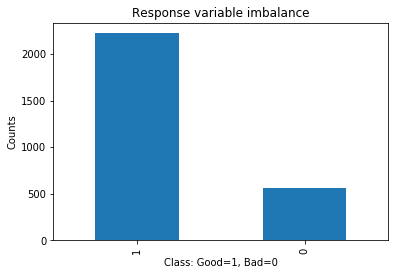

In [222]:
df['good_bad_flag'].value_counts().plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Class: Good=1, Bad=0')
plt.title('Response variable imbalance')
plt.show()

** There is a huge imbalance of data, first we will need to balance the data, by down sampling th majority class**

#### Down sampling majority class, in this case class 0.

In [223]:
# Separate majority and minority classes
df_majority = df[df['good_bad_flag']==1]
df_minority = df[df['good_bad_flag']==0]

In [224]:
len(df_majority),len(df_minority)

(2220, 564)

In [225]:
# Downsample manjority class
df_majority_downsampled = resample(df_majority, 
                                     replace=False,     # sample with replacement
                                     n_samples=len(df_minority),    # to match minority class
                                     random_state=123)   # reproducible results 

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])


In [226]:
df= df_downsampled.reset_index(drop=True)

#### Splitting data in to predictive features (X) and response variables (y)

In [227]:
X = df.drop(['customerid','birthdate','systemloanid','approveddate','creationdate','good_bad_flag'],axis=1)
y = df['good_bad_flag']

#### Feature scaling

In [228]:
# initiating scaling object
featurescale = StandardScaler()

In [229]:
# Scaling X features using standard scalers
X = featurescale.fit_transform(X)

In [230]:
X[:3]

array([[-1.76862361,  1.34366878,  2.8739761 ,  1.27789161,  2.12678106,
         2.28854202,  2.67362789,  0.60648286, -0.80107657, -1.68293974],
       [ 0.49843029,  2.18898857, -0.40392586, -0.05877543,  0.24076767,
         0.30045709,  0.02582081, -0.87037346,  0.37780715, -1.10396084],
       [ 0.49843029, -0.13564085, -0.40392586, -0.86077565, -0.70223903,
        -0.67243553,  0.02582081,  0.770578  , -0.80107657,  0.16979275]])

### Model building

#### Train test split data: 80% data for training and 20% for testing

In [232]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 20)

In [233]:
names = ['Logistic Regression', 
         'SVM', 
         'LDA', 
         "QDA",          
         "Decision Tree", 
         "Random Forest"]

classifiers = [
    LogisticRegression(), 
    SVC(),       
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),    
    DecisionTreeClassifier(),
    RandomForestClassifier()    
]

In [234]:
#Lets run all our models
results = []

models = {}
confusion_train = {}
class_report_train = {}
confusion_test = {}
class_report_test = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    #training model
    clf.fit(x_train, y_train)

    #predicting
    y_pred = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)

    #saving results
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    accuracy_test  = metrics.accuracy_score(y_test, y_pred_test)
    precision = metrics.precision_score(y_train, y_pred)
    precision_test = metrics.precision_score(y_test, y_pred_test)
    recall    = metrics.recall_score(y_train, y_pred)
    recall_test    = metrics.recall_score(y_test, y_pred_test)

    f1        = metrics.f1_score(y_train, y_pred)
    f1_test   = metrics.f1_score(y_test, y_pred_test)

    # save the results to dictionaries
    models[name] = clf
    confusion_train[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report_train[name] = metrics.classification_report(y_train, y_pred)
    confusion_test[name] = metrics.confusion_matrix(y_test, y_pred_test)
    class_report_test[name] = metrics.classification_report(y_test, y_pred_test)
    results.append([name, accuracy,accuracy_test, precision,precision_test, recall,recall_test, f1, f1_test])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Accuracy Test', 'Precision','Precision Test', 'Recall','Recall Test', 'F1 Train', 'F1 Test'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...
Fitting SVM model...
Fitting LDA model...
Fitting QDA model...
Fitting Decision Tree model...
Fitting Random Forest model...


In [235]:
results.sort_values('F1 Test', ascending=False)

Accuracy  Accuracy Test  Precision  Precision Test  \
Classifier                                                                
SVM                  0.689579       0.544248   0.707373        0.504587   
Decision Tree        1.000000       0.495575   1.000000        0.457627   
Logistic Regression  0.576497       0.522124   0.592857        0.480769   
LDA                  0.578714       0.522124   0.595694        0.480769   
Random Forest        0.982262       0.526549   0.995536        0.485149   
QDA                  0.614191       0.539823   0.680645        0.500000   

                       Recall  Recall Test  F1 Train   F1 Test  
Classifier                                                      
SVM                  0.667391     0.528846  0.686801  0.516432  
Decision Tree        1.000000     0.519231  1.000000  0.486486  
Logistic Regression  0.541304     0.480769  0.565909  0.480769  
LDA                  0.541304     0.480769  0.567198  0.480769  
Random Forest        0.969565     0.471154  0.982379  0.478049  
QDA                  0.458696     0.375000  0.548052  0.428571

#### Lets visualise our model perfomance, rank by F1 Test and Accuracy

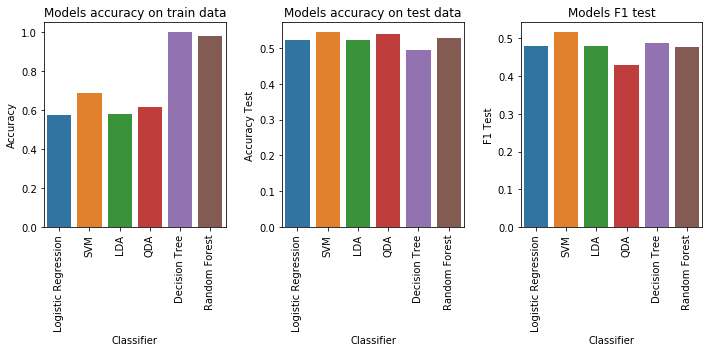

In [236]:
results = results.reset_index()
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(10, 5))
sns.barplot(data= results,x='Classifier',y='Accuracy',ax=ax1)
plt.setp(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Models accuracy on train data')
sns.barplot(data= results,x='Classifier',y='Accuracy Test',ax=ax2)
plt.setp(ax2.get_xticklabels(), rotation=90)
ax2.set_title('Models accuracy on test data')
sns.barplot(data= results,x='Classifier',y='F1 Test',ax=ax3)
plt.setp(ax3.get_xticklabels(), rotation=90)
ax3.set_title('Models F1 test')
plt.tight_layout()
plt.show()

** Decision tree and Random forest have highest accuracy score on train data, but low F1 score and accuracy score on testing data compared to other models. But are they not really doing well, they seems to just have high variance**

#### Evaluating model  by checking the actual perfomance of the model, using confusion matrix and Classification report
​
Detailed explanation for these metrics: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support


#### Logistic regression

In [238]:
confusion_train['Logistic Regression']

array([[271, 171],
       [211, 249]], dtype=int64)

In [239]:
confusion_test['Logistic Regression']

array([[68, 54],
       [54, 50]], dtype=int64)

In [240]:
print(class_report_train['Logistic Regression'])

             precision    recall  f1-score   support

          0       0.56      0.61      0.59       442
          1       0.59      0.54      0.57       460

avg / total       0.58      0.58      0.58       902



In [241]:
print(class_report_test['Logistic Regression'])

             precision    recall  f1-score   support

          0       0.56      0.56      0.56       122
          1       0.48      0.48      0.48       104

avg / total       0.52      0.52      0.52       226



#### SVM

In [242]:
confusion_train['SVM']

array([[315, 127],
       [153, 307]], dtype=int64)

In [243]:
confusion_test['SVM']

array([[68, 54],
       [49, 55]], dtype=int64)

In [244]:
print(class_report_train['SVM'])

             precision    recall  f1-score   support

          0       0.67      0.71      0.69       442
          1       0.71      0.67      0.69       460

avg / total       0.69      0.69      0.69       902



In [245]:
print(class_report_test['SVM'])

             precision    recall  f1-score   support

          0       0.58      0.56      0.57       122
          1       0.50      0.53      0.52       104

avg / total       0.55      0.54      0.54       226



#### LDA

In [246]:
confusion_train['LDA']

array([[273, 169],
       [211, 249]], dtype=int64)

In [247]:
confusion_test['LDA']

array([[68, 54],
       [54, 50]], dtype=int64)

In [248]:
print(class_report_train['LDA'])

             precision    recall  f1-score   support

          0       0.56      0.62      0.59       442
          1       0.60      0.54      0.57       460

avg / total       0.58      0.58      0.58       902



In [249]:
print(class_report_test['LDA'])

             precision    recall  f1-score   support

          0       0.56      0.56      0.56       122
          1       0.48      0.48      0.48       104

avg / total       0.52      0.52      0.52       226



#### QDA 

In [250]:
confusion_train['QDA']

array([[343,  99],
       [249, 211]], dtype=int64)

In [251]:
confusion_test['QDA']

array([[83, 39],
       [65, 39]], dtype=int64)

In [252]:
print(class_report_train['QDA'])

             precision    recall  f1-score   support

          0       0.58      0.78      0.66       442
          1       0.68      0.46      0.55       460

avg / total       0.63      0.61      0.60       902



In [253]:
print(class_report_test['QDA'])

             precision    recall  f1-score   support

          0       0.56      0.68      0.61       122
          1       0.50      0.38      0.43       104

avg / total       0.53      0.54      0.53       226



#### Decision Tree

In [254]:
confusion_train['Decision Tree']

array([[442,   0],
       [  0, 460]], dtype=int64)

In [255]:
confusion_test['Decision Tree']

array([[58, 64],
       [50, 54]], dtype=int64)

In [256]:
print(class_report_train['Decision Tree'])

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       442
          1       1.00      1.00      1.00       460

avg / total       1.00      1.00      1.00       902



In [257]:
print(class_report_test['Decision Tree'])

             precision    recall  f1-score   support

          0       0.54      0.48      0.50       122
          1       0.46      0.52      0.49       104

avg / total       0.50      0.50      0.50       226



#### Random Forest

In [258]:
confusion_train['Random Forest']

array([[440,   2],
       [ 14, 446]], dtype=int64)

In [259]:
confusion_test['Random Forest']

array([[70, 52],
       [55, 49]], dtype=int64)

In [260]:
print(class_report_train['Random Forest'])

             precision    recall  f1-score   support

          0       0.97      1.00      0.98       442
          1       1.00      0.97      0.98       460

avg / total       0.98      0.98      0.98       902



In [261]:
print(class_report_test['Random Forest'])

             precision    recall  f1-score   support

          0       0.56      0.57      0.57       122
          1       0.49      0.47      0.48       104

avg / total       0.53      0.53      0.53       226



** As we have observe before, Decision tree accurately learn on training data, and predict target_var well, good=1 and bad=0, compared to other models. But on a test data, that is the data that the model have not seen, it is failing to accurately predict all class well, and underperfome. This is because decision tree and random forest have high varience. SVM seems to have learned well the training data, and has high accuracy on a test data. Therefore SVM perfome well compare to the rest of the models on a testing data **
